In [1]:
# Import TensorFlow Datasets
import tensorflow_datasets as tfds
import tensorflow as tf

# Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset, metadata = tfds.load('mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [3]:
type(dataset)

dict

In [4]:
metadata.features

FeaturesDict({
    'image': Image(shape=(28, 28, 1), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
})

In [5]:
metadata.features["label"].names

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [6]:
metadata.features["image"]

Image(shape=(28, 28, 1), dtype=uint8)

In [7]:
len(test_dataset)

10000

In [8]:
len(train_dataset)

60000

In [9]:
def normalize(images, labels):
  images /= 255
  return images, labels

train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

train_dataset =  train_dataset.cache()
test_dataset  =  test_dataset.cache()

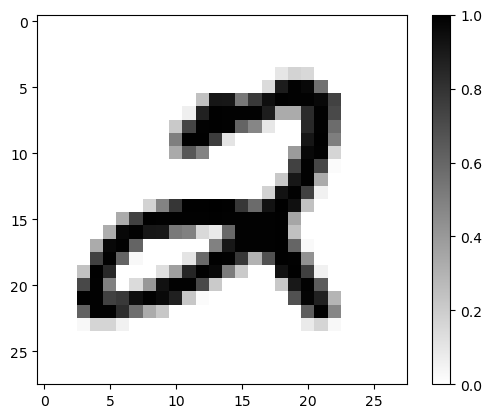

In [10]:
for image, label in test_dataset.take(1):
  None

plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

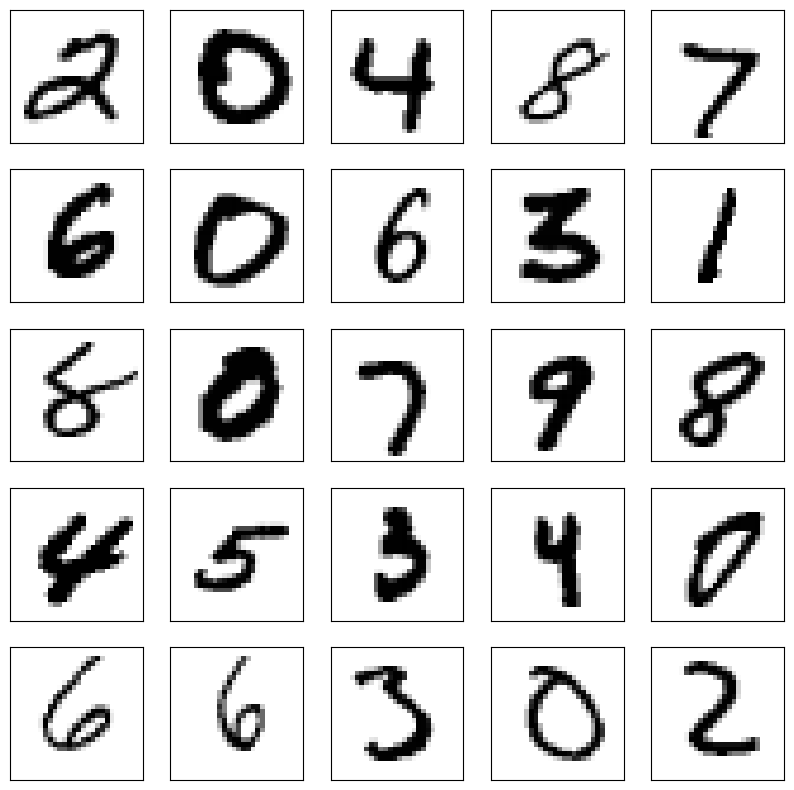

In [11]:
plt.figure(figsize=(10,10))
i = 0
for (image, label) in test_dataset.take(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    i += 1
plt.show()

In [12]:
BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(60000).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [13]:
print (train_dataset)

<_BatchDataset element_spec=(TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>


In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
hist = model.fit(train_dataset, epochs=50, steps_per_epoch=math.ceil(60000/BATCH_SIZE))

Epoch 1/50
1875/1875 [==============================] - 10s 4ms/step - loss: 0.2545 - accuracy: 0.9276
Epoch 2/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1094 - accuracy: 0.9676
Epoch 3/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0751 - accuracy: 0.9778
Epoch 4/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0547 - accuracy: 0.9838
Epoch 5/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0431 - accuracy: 0.9871
Epoch 6/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0362 - accuracy: 0.9887
Epoch 7/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0277 - accuracy: 0.9915
Epoch 8/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0226 - accuracy: 0.9931
Epoch 9/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0186 - accuracy: 0.9946
Epoch 10/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.01

In [17]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(10000/BATCH_SIZE))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1562 - accuracy: 0.9779
Accuracy on test dataset: 0.9779000282287598


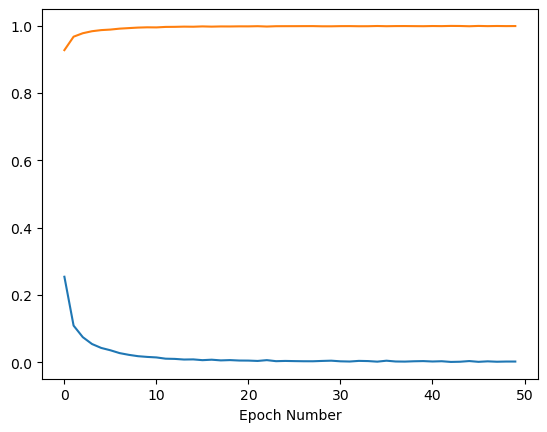

In [18]:
plt.xlabel('Epoch Number')
plt.plot(hist.history['loss']);
plt.plot(hist.history['accuracy']);

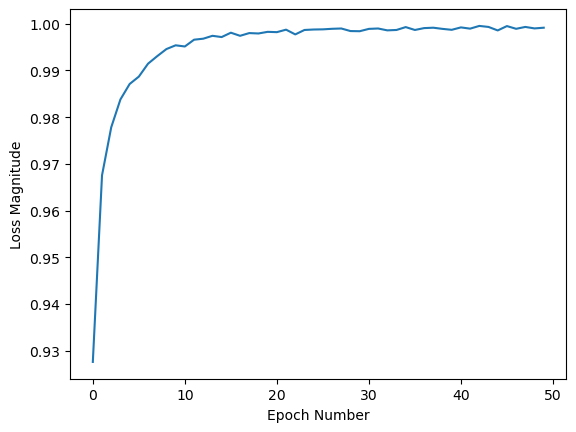

In [19]:
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(hist.history['accuracy']);

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Confusion Matrix

In [21]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [22]:
dataset, metadata = tfds.load('mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

313/313 [==============================] - 1s 1ms/step


(<Figure size 800x800 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

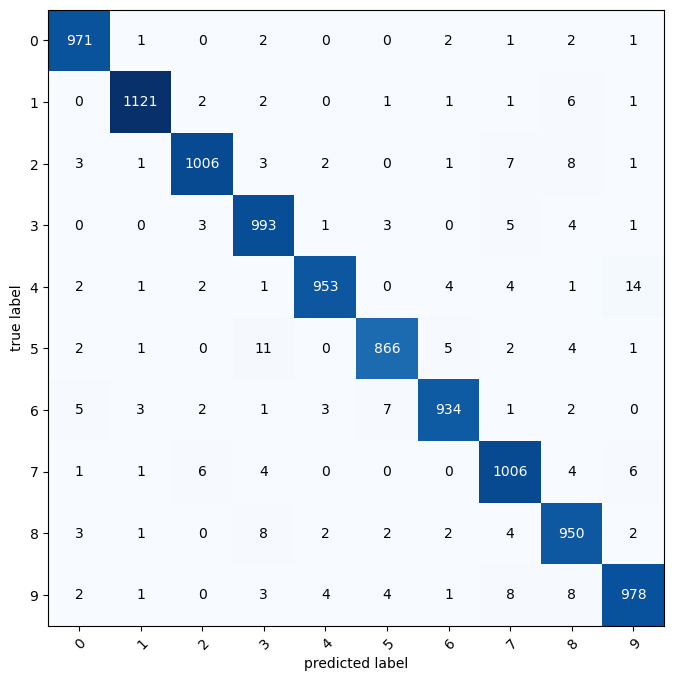

In [24]:
validation_batches = test_dataset.batch(BATCH_SIZE)

pred = model.predict(validation_batches)
pred = np.argmax(pred,axis=1)
true = tf.concat([y for x,y in validation_batches],axis=0)
mat = confusion_matrix(true,pred)
plot_confusion_matrix(conf_mat=mat,figsize=(8,8), class_names=metadata.features['label'].names)

# Save model

## Tensorflow format

In [30]:
model.save('mnist')

INFO:tensorflow:Assets written to: mnist\assets


INFO:tensorflow:Assets written to: mnist\assets


# Load model

In [31]:
model1 = tf.keras.models.load_model('mnist')

In [32]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
